In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from class2 import facies_classification, Petrophysics, rename_columns, rearrange_columns

In [6]:
well = pd.read_csv('data/freeman_well_3_perm.csv')
well.head()

,DEPT,DEN,DT,GR,NEU,RES_DEP,PHI,PERM
0,5633.5,NaN,NaN,12.1597,NaN,NaN,NaN,NaN
1,5634.0,NaN,NaN,44.0750,NaN,NaN,NaN,NaN
2,5634.5,NaN,NaN,44.0750,NaN,NaN,NaN,NaN
3,5635.0,NaN,NaN,44.0750,NaN,NaN,NaN,NaN
4,5635.5,NaN,NaN,43.7159,NaN,NaN,NaN,NaN


In [7]:
old_names = ['DEPT', 'DEN', 'NEU', 'RES_DEP']#list(well.columns)
new_names = ['Depth', 'RHOB', 'NPHI', 'Log_ILD']
df = rename_columns(well, old_names, new_names)

In [8]:
order = ['Depth', 'GR', 'Log_ILD', 'DT', 'RHOB', 'NPHI', 'PHI', 'PERM']
data = rearrange_columns(df, order)

In [9]:
data['Facies'] = facies_classification(data['GR'])

In [10]:
data['Facies'].unique()

array([ 1.,  2.,  3., nan])

In [11]:
data.head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies
0,5633.5,12.1597,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,5634.0,44.0750,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,5634.5,44.0750,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,5635.0,44.0750,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5635.5,43.7159,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [12]:
test = Petrophysics(data)

In [13]:
x = test.slowness_to_velocity(3)
y = test.gamma_ray_index(1)
d = test.vshale_linear()
z = test.porosity_effective(0.134)
a = test.formation_factor(0.62, 2.15)

In [14]:
data.head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,GRI,vshale,PHIeff,formation_factor
0,5633.5,12.1597,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,-0.2197,-0.035753,NaN,NaN
1,5634.0,44.0750,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1526,0.039757,NaN,NaN
2,5634.5,44.0750,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1526,0.039757,NaN,NaN
3,5635.0,44.0750,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1526,0.039757,NaN,NaN
4,5635.5,43.7159,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1484,0.038442,NaN,NaN


In [15]:
b = test.swirr()
c = test.permeability()

In [16]:
data.describe()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,GRI,vshale,PHIeff,formation_factor,swirr,permeability
count,8214.000000,8152.000000,7987.000000,7891.000000,7963.000000,7939.000000,7963.000000,7.963000e+03,8152.000000,7891.000000,8152.000000,8152.000000,7925.000000,7963.000000,7963.000000,7963.000000
mean,7686.750000,86.782904,4.889347,141.075289,2.174444,0.546800,0.306811,1.471768e+04,2.598013,7188.997730,0.650852,0.414133,0.250477,11.078706,0.067332,2975.995939
std,1185.660944,18.056366,76.781433,16.536080,0.124344,0.133148,0.080223,1.135310e+05,0.758681,888.791559,0.210650,0.218876,0.086304,132.839795,0.031716,1610.422808
min,5633.500000,12.159700,0.093800,51.200000,1.347000,0.253500,0.010200,8.109753e+01,1.000000,4766.444233,-0.219700,-0.035753,0.001643,0.900585,0.021220,307.634866
25%,6660.125000,80.646500,0.898000,130.600000,2.101650,0.460800,0.251700,1.878890e+03,3.000000,6600.660066,0.579275,0.283675,0.191846,5.790211,0.053806,1987.830564
50%,7686.750000,89.241150,1.058100,138.700000,2.192200,0.519800,0.295400,3.318045e+03,3.000000,7209.805335,0.679500,0.391147,0.242776,8.531181,0.065311,2622.674160
75%,8713.375000,97.834875,1.290250,151.500000,2.259900,0.603500,0.353750,7.090242e+03,3.000000,7656.967841,0.779825,0.530276,0.297078,12.036294,0.077577,3628.442551
max,9740.000000,125.199000,1950.000000,209.800000,2.634200,1.795600,0.840600,4.001362e+06,3.000000,19531.250000,1.099000,1.307453,0.804921,11854.993500,2.434645,19067.767453


# FEATURE ENGINEERING

Detecting outlier using Z Score method

In [17]:
# imports
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

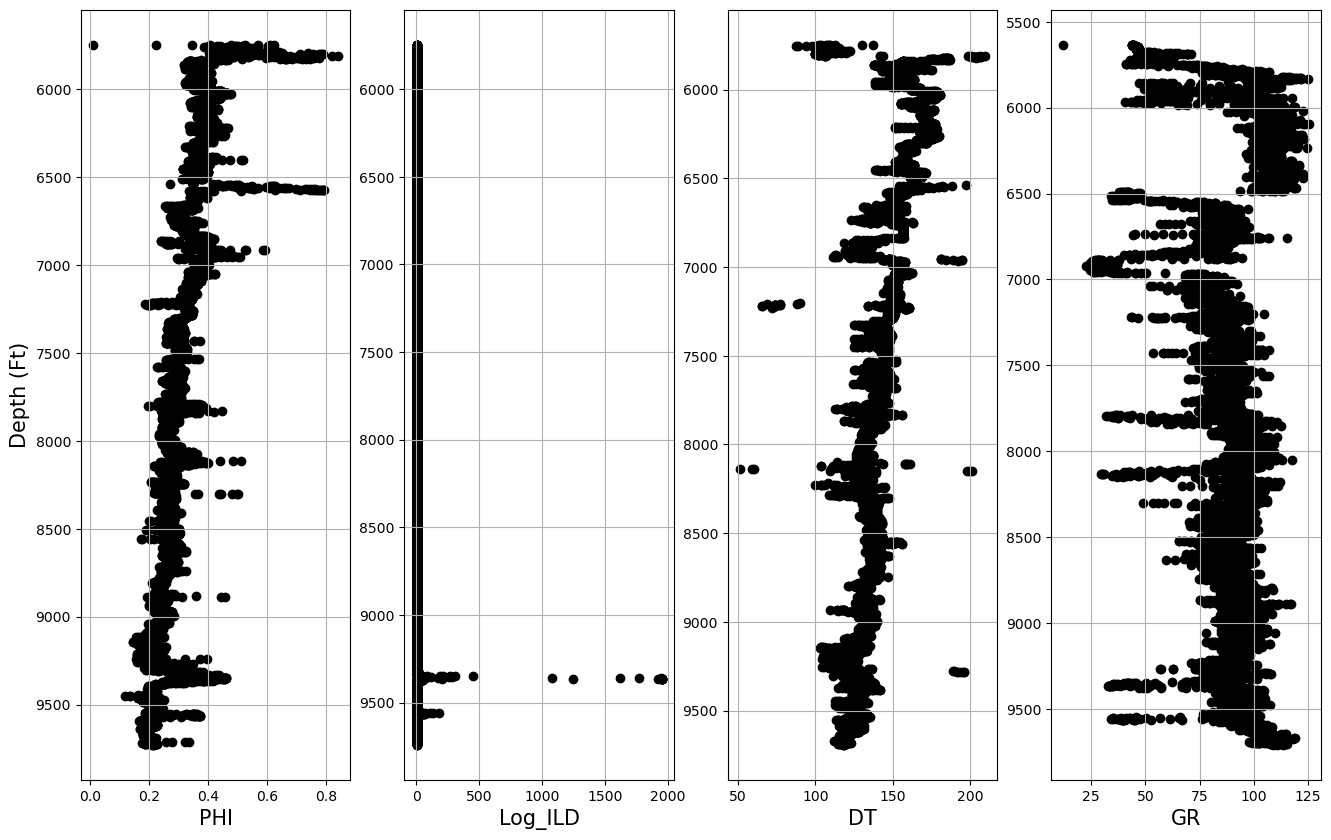

In [18]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(16,10),linewidth=3)

curves = ['PHI','Log_ILD','DT','GR']

for i in range(len(curves)):
    ax[i].scatter(df[curves[i]],df['Depth'],c='k')
    ax[i].set_xlabel(curves[i],fontsize=15)
    ax[0].set_ylabel('Depth (Ft)',fontsize=15)
    ax[i].yaxis.grid(True)
    ax[i].xaxis.grid(True)
    ax[i].invert_yaxis()
    
plt.savefig('images/outlier_scatter_plot_3.png')

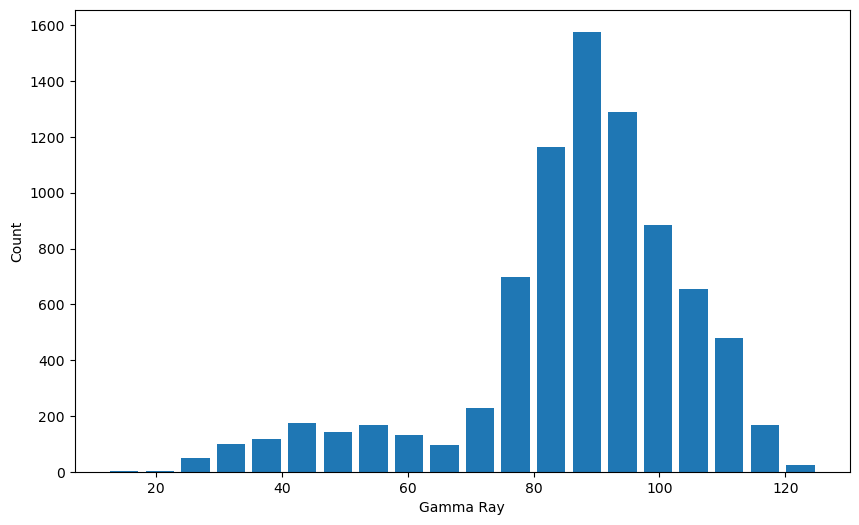

In [19]:
plt.hist(data.GR, bins=20, rwidth=0.8)
plt.xlabel('Gamma Ray')
plt.ylabel('Count')
plt.show()

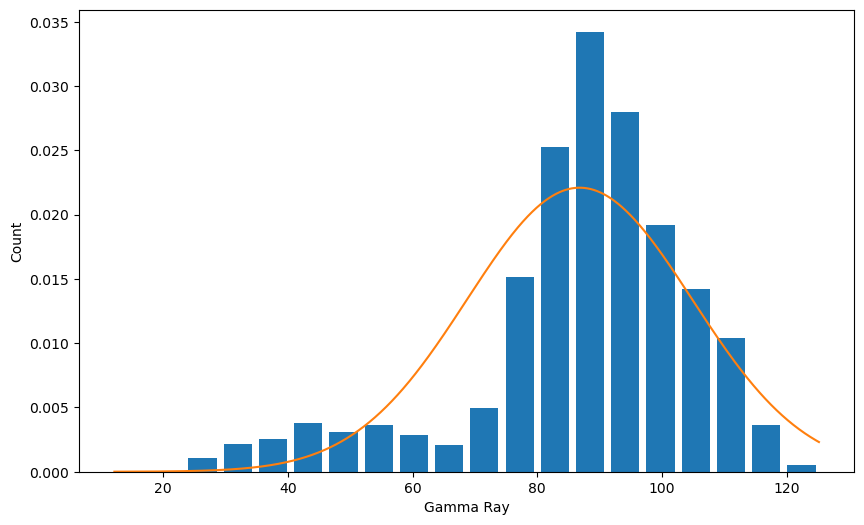

In [20]:
from scipy.stats import norm

plt.hist(data.GR, bins=20, rwidth=0.8, density=True)
plt.xlabel('Gamma Ray')
plt.ylabel('Count')

rng = np.arange(data.GR.min(), data.GR.max(), 0.1)
plt.plot(rng, norm.pdf(rng,data.GR.mean(),data.GR.std()))
plt.savefig('images/histogram_3.png')

In [21]:
data.GR.mean()

86.78290428115788

In [22]:
data.GR.std()

18.05636624523916

# Outlier detection and removal using Z Score

In [23]:
data['zscore'] = ( data.GR - data.GR.mean() ) / data.GR.std()
data.head(5)

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,GRI,vshale,PHIeff,formation_factor,swirr,permeability,zscore
0,5633.5,12.1597,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,-0.2197,-0.035753,NaN,NaN,NaN,NaN,-4.132792
1,5634.0,44.0750,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1526,0.039757,NaN,NaN,NaN,NaN,-2.365255
2,5634.5,44.0750,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1526,0.039757,NaN,NaN,NaN,NaN,-2.365255
3,5635.0,44.0750,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1526,0.039757,NaN,NaN,NaN,NaN,-2.365255
4,5635.5,43.7159,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1484,0.038442,NaN,NaN,NaN,NaN,-2.385142


In [24]:
data[data['zscore']>3].head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,GRI,vshale,PHIeff,formation_factor,swirr,permeability,zscore


In [25]:
data[data['zscore']<-3].head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,GRI,vshale,PHIeff,formation_factor,swirr,permeability,zscore
0,5633.5,12.1597,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,-0.2197,-0.035753,NaN,NaN,NaN,NaN,-4.132792
2504,6885.5,29.9579,1.1562,133.5,2.0487,0.4556,0.3879,11057.773219,1.0,7490.636704,-0.0121,-0.002536,0.388240,4.749459,0.048731,4300.951375,-3.147090
2505,6886.0,26.4968,1.1942,130.6,2.0707,0.4895,0.3737,9192.064245,1.0,7656.967841,-0.0525,-0.010456,0.375101,5.145967,0.050725,4013.792014,-3.338773
2506,6886.5,27.2804,1.2047,132.5,2.0699,0.4551,0.3743,9264.118288,1.0,7547.169811,-0.0433,-0.008724,0.375469,5.128248,0.050637,4025.708850,-3.295375
2507,6887.0,28.2533,1.2203,134.3,2.0581,0.4065,0.3819,10227.212334,1.0,7446.016381,-0.0320,-0.006540,0.382776,4.911339,0.049555,4178.310111,-3.241494


In [26]:
data[(data.zscore<-3) | (data.zscore>3)].head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,GRI,vshale,PHIeff,formation_factor,swirr,permeability,zscore
0,5633.5,12.1597,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,-0.2197,-0.035753,NaN,NaN,NaN,NaN,-4.132792
2504,6885.5,29.9579,1.1562,133.5,2.0487,0.4556,0.3879,11057.773219,1.0,7490.636704,-0.0121,-0.002536,0.388240,4.749459,0.048731,4300.951375,-3.147090
2505,6886.0,26.4968,1.1942,130.6,2.0707,0.4895,0.3737,9192.064245,1.0,7656.967841,-0.0525,-0.010456,0.375101,5.145967,0.050725,4013.792014,-3.338773
2506,6886.5,27.2804,1.2047,132.5,2.0699,0.4551,0.3743,9264.118288,1.0,7547.169811,-0.0433,-0.008724,0.375469,5.128248,0.050637,4025.708850,-3.295375
2507,6887.0,28.2533,1.2203,134.3,2.0581,0.4065,0.3819,10227.212334,1.0,7446.016381,-0.0320,-0.006540,0.382776,4.911339,0.049555,4178.310111,-3.241494


In [27]:
df2 = data[(data.zscore>-3) & (data.zscore<3)]
df2.head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,GRI,vshale,PHIeff,formation_factor,swirr,permeability,zscore
1,5634.0,44.0750,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1526,0.039757,NaN,NaN,NaN,NaN,-2.365255
2,5634.5,44.0750,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1526,0.039757,NaN,NaN,NaN,NaN,-2.365255
3,5635.0,44.0750,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1526,0.039757,NaN,NaN,NaN,NaN,-2.365255
4,5635.5,43.7159,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1484,0.038442,NaN,NaN,NaN,NaN,-2.385142
5,5636.0,43.6854,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.1481,0.038348,NaN,NaN,NaN,NaN,-2.386832


In [28]:
df2.shape

(8043, 17)

In [29]:
data.shape

(8214, 17)

In [30]:
df2.isnull().sum()

Depth                 0
GR                    0
Log_ILD             226
DT                  260
RHOB                226
NPHI                226
PHI                 226
PERM                226
Facies                0
velocity            260
GRI                   0
vshale                0
PHIeff              226
formation_factor    226
swirr               226
permeability        226
zscore                0
dtype: int64

In [31]:
df3 = df2.dropna()
df3.isnull().sum()

Depth               0
GR                  0
Log_ILD             0
DT                  0
RHOB                0
NPHI                0
PHI                 0
PERM                0
Facies              0
velocity            0
GRI                 0
vshale              0
PHIeff              0
formation_factor    0
swirr               0
permeability        0
zscore              0
dtype: int64

In [32]:
# df3.drop(['zscore'],axis=1,inplace=True)
df3 = df3.loc[:, df3.columns != 'zscore']

In [33]:
df3['Facies'].unique()

array([1., 2., 3.])

In [34]:
tops = ('Lower Pliocene', 'Upper Miocene', 'MFS 5.0', 'Top Upper Miocene', 'MFS 6.0', 'MFS 7.4', 'Middle Miocene',
            'MFS 9.5', 'Top Middl Miocene')
tops_depths = (1508.76, 1889.76, 1954.92, 2094.59, 2182.99, 2349.8, 2559.63, 2620.07, 2674.83)

In [35]:
# Create the figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=df[(df.Depth >= top_depth) & (df.Depth <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
        
#1st track: GR, CALI, SP track
    
#    ax01=ax[0].twiny()
#    ax01.set_xlim(-100,10)
#    ax01.spines['top'].set_position(('outward',0))
#    ax01.set_xlabel("SP [mV]")
#    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='blue')
#    ax01.set_xlabel('SP[mV]',color='blue')    
#    ax01.tick_params(axis='x', colors='blue')
#    ax01.grid(True)
    
    
#    ax02=ax[0].twiny()
#    ax02.set_xlim(6,36)
#    ax02.plot(logs.CALI, logs.DEPT, '--', label='CALN[in]', color='black') 
#    ax02.spines['top'].set_position(('outward',40))
#    ax02.set_xlabel('CALI[in]',color='black')    
#    ax02.tick_params(axis='x', colors='black')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.Depth, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    
#2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.2,200)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[m.ohm]', color='red')
    ax11.plot(logs.Log_ILD, logs.Depth, label='ILD[m.ohm]', color='red')
    ax11.tick_params(axis='x', colors='red')    
    
#    ax12=ax[1].twiny()
#    ax12.set_xlim(0.1,100)
#    ax12.set_xscale('log')
#    ax12.plot(logs.ILM, logs.DEPT, label='ILM[m.ohm]', color='purple') 
#    ax12.spines['top'].set_position(('outward',40))
#    ax12.set_xlabel('ILM[m.ohm]', color='purple')    
#    ax12.tick_params(axis='x', colors='purple')
    
        
#    ax13=ax[1].twiny()
#    ax13.set_xlim(0.1,100)
#    ax13.set_xscale('log')
#    ax13.plot(logs.LL8, logs.DEPT, '--',label='LL8[m.ohm]', color='black') 
#    ax13.spines['top'].set_position(('outward',0))
#    ax13.set_xlabel('LL8[m.ohm]',color='black')
#    ax13.tick_params(axis='x', colors='black')

    
#3rd track: RHOB, NPHI track
    
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(150,80)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(logs.DT, logs.Depth, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('DT[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax22.invert_xaxis()
    ax22.plot(logs.NPHI, logs.Depth, label='NPHI[%]', color='green') 
    ax22.spines['top'].set_position(('outward',40))
    ax22.set_xlabel('NPHI[%]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(logs.RHOB, logs.Depth ,label='RHOB[g/cc]', color='red') 
    ax23.spines['top'].set_position(('outward',80))
    ax23.set_xlabel('RHOB[g/cc]',color='red')
    ax23.tick_params(axis='x', colors='red')
    

#3rd track: DT track

    
    plt.savefig ('images/triple_combo_plot_3.png', dpi=200, format='png')

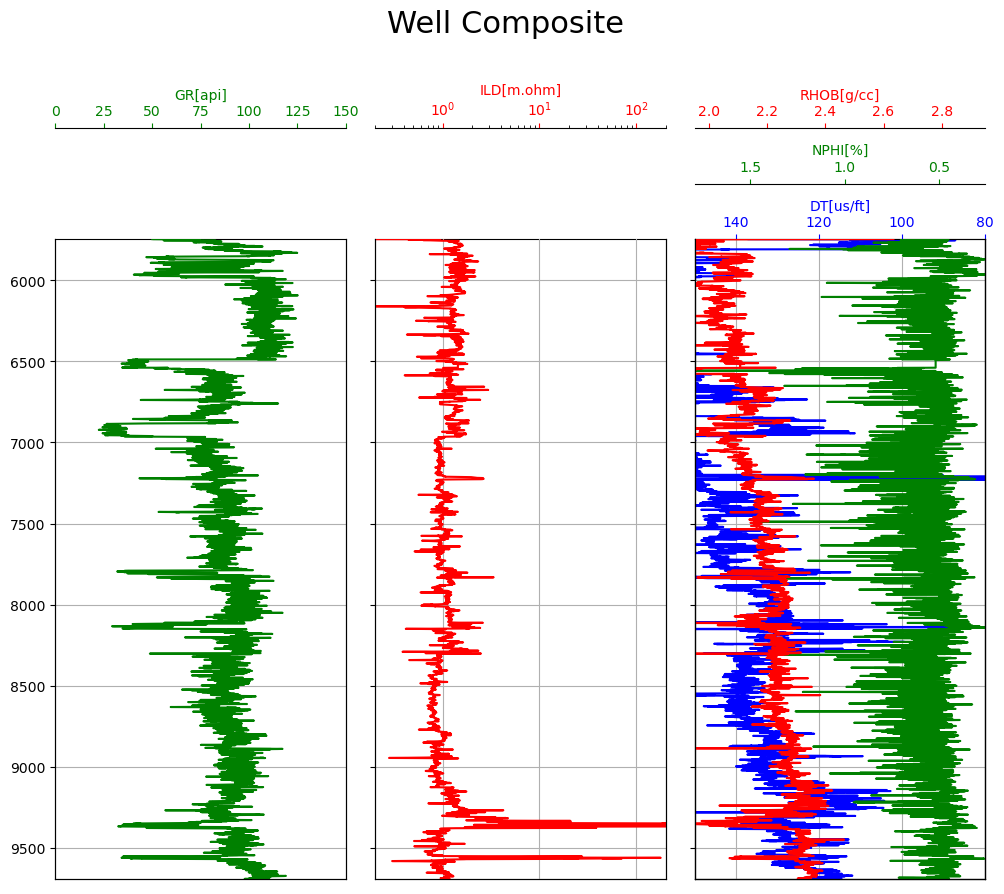

In [36]:
#%matplotlib nbagg

triple_combo_plot(df3.Depth.min(), df3.Depth.max())

In [37]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns

In [38]:
#del facies_colors, facies_labels

facies_colors = ['r', 'b','g']

facies_labels = [0, 1, 2,]

# facies_colors = ['r', 'b','g','#6E2C00',
#        '#1B4F72','k']

# facies_labels = [0, 1, 2, 3, 4,
#                  5]

In [39]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
# df3['Facies_code']= lab_enc.fit_transform(df3['Facies'])
df3.loc[:, 'Facies_code'] = lab_enc.fit_transform(df3['Facies'])
df3 = df3.loc[:, df3.columns != 'Facies']
df3.head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,velocity,GRI,vshale,PHIeff,formation_factor,swirr,permeability,Facies_code
227,5747.0,50.0686,0.0938,137.0,2.6342,0.5620,0.0102,81.097528,7299.270073,0.2225,0.063859,0.001643,11854.993500,2.434645,307.634866,0
228,5747.5,50.6811,0.1975,130.4,2.3044,0.5091,0.2230,1293.292278,7668.711656,0.2297,0.066596,0.214076,15.614793,0.088359,1626.064932,0
229,5748.0,53.6817,0.9398,109.2,2.1121,0.5849,0.3470,6493.991919,9157.509158,0.2647,0.080645,0.336194,6.035084,0.054932,3502.846248,0
230,5748.5,58.9540,0.7118,106.9,2.0211,0.6879,0.4057,13940.185417,9354.536950,0.3262,0.108603,0.391147,4.312717,0.046437,4676.035319,0
231,5749.0,66.5252,0.4420,102.1,1.9073,0.6982,0.4792,36280.312993,9794.319295,0.4145,0.157299,0.458122,3.014953,0.038826,6403.011585,0


In [40]:
# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#DC7633','#6E2C00']

facies_labels = ['sand', 'shaly sand', 'shale']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies_code'] -1]
    
# df3.loc[:,'FaciesLabels'] = df3.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [41]:
# df3.drop(['FaciesLabels'],axis=1,inplace=True)
# df3.head()

In [42]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies_code'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.Log_ILD, logs.Depth, '-')
    ax[2].plot(logs.NPHI, logs.Depth, '-', color='0.40')
    ax[3].plot(logs.RHOB, logs.Depth, '-', color='r')
    ax[4].plot(logs.DT, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=2)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="25%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join(['sand', 'shaly sand', 'shale']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.Log_ILD.min(),logs.Log_ILD.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("DT")
    ax[4].set_xlim(logs.DT.min(),logs.DT.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    # f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)
    plt.savefig("images/facies_plot_3.png", dpi=300)

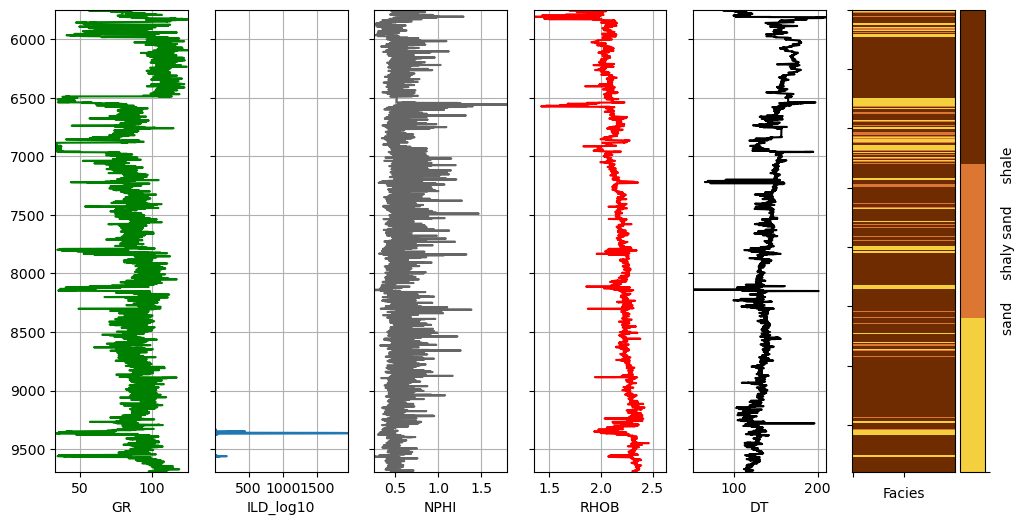

In [43]:
make_facies_log_plot(
    df3,
    facies_colors)

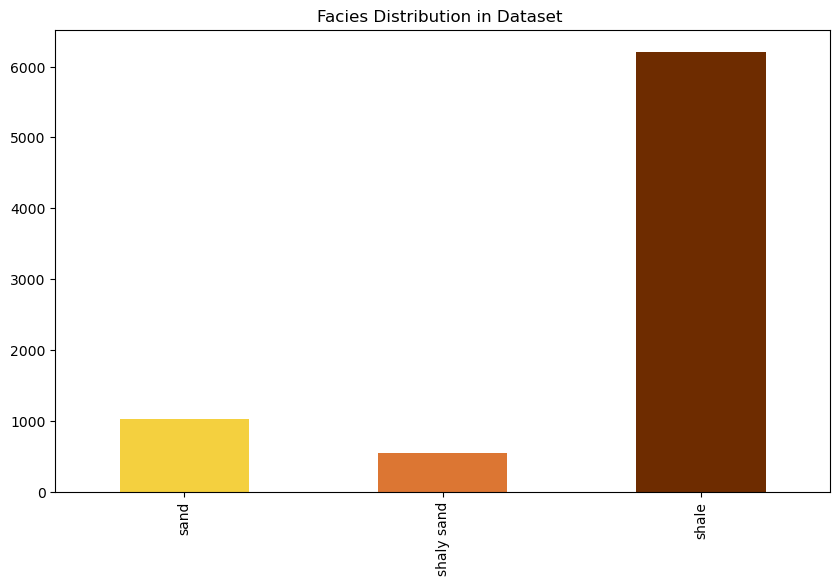

In [44]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = df3['Facies_code'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Facies Distribution in Dataset ')
facies_counts
plt.savefig("images/F_Dist_3.png", dpi=300)

In [45]:
df3.to_csv('data/freeman_well_3_eng.csv', index=False)